___
# Ciência dos Dados - PROJETO 1

## Matheus Augusto Soares
___

## Renda ou tipo de moradia?Oque influencia mais para a pessoa possuir internet e telefone fixo?

___
## Introdução
Por meio desta análise tenho como objetivo mostrar como a a internet banda larga possuiu um grande crescimento estando cada vez mais em diversas casas ao contrario da rede telefônica fixa que cada vez perdeu mais espaço.
E também demonstrar que a baixa renda se mostra um obstáculo a mais para a rede telefônica fixa, mas não para a internet, considerando que grande parte da população de baixa renda ainda possui esse tipo de acesso a rede.

___
## Análise e Resultados

In [2]:
#Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#Renda ou tipo de moradia?Oque influencia mais para a pessoa possuir internet e telefone fixo?
#Definindo dataframes 
dados = pd.read_csv('DOM2015.csv',sep=',')
dados.head()

df1=dados.loc[:,['V0207','V2020','V02426','V4621']]

#df1.dropna()
df2=df1.dropna(how='any')
#df1.dropna(subset=['V0207','V2020','V02426','V4621'])

df2.V0207= df2.V0207.astype('category')
df2.V2020 =df2.V2020.astype('category')
df2.V02426 = df2.V02426.astype('category')
df2.V4621 = df2.V4621.astype('float')

df2.V0207.cat.categories = ('Próprio-Já Pago','Próprio-Ainda Pagando','Alugado','Cedido por Empregador','Cedido de outra forma',"",)
df2.V2020.cat.categories = ('Sim', 'Não')
df2.V02426.cat.categories = ('Sim', 'Não')

#V0207=Condiçao do domicílio
#V2020=Tem telefone fixo
#V02426=Acesso a internet via banda larga 
#V4621=Renda per capita domiciliar

df2.head()



C:\Users\mathe\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,V0207,V2020,V02426,V4621
2,Alugado,Não,Sim,1150.0
3,Próprio-Já Pago,Sim,Sim,793.0
5,Próprio-Já Pago,Sim,Sim,1990.0
8,Alugado,Sim,Sim,818.0
10,Próprio-Já Pago,Sim,Sim,1716.0


In [3]:
print('Tabela Cruzada % Telefone Fixo:')
ct=pd.crosstab(df2.V0207,df2.V2020,margins=True,rownames=['Tipo de casa'], colnames=['Possui?'])
ct=ct.iloc[:,:2]

ct

Tabela Cruzada % Telefone Fixo:


Possui?,Sim,Não
Tipo de casa,,
Próprio-Já Pago,22714,23618
Próprio-Ainda Pagando,2125,2151
Alugado,4107,9515
Cedido por Empregador,174,529
Cedido de outra forma,884,1872
,59,86
All,30063,37771


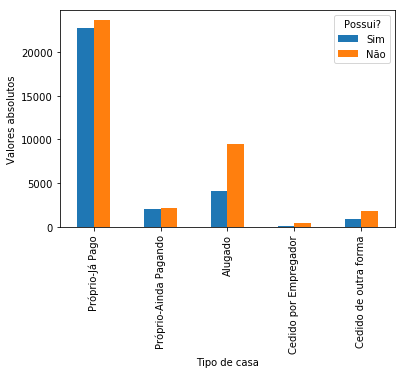

In [21]:
plot = ct.iloc[0:5,].plot(kind='bar')
plt.ylabel('Valores absolutos')

In [5]:
print('Tabela Cruzada % Internet Banda Larga:')
ct1=pd.crosstab(df2.V0207,df2.V02426,margins=True,rownames=['Tipo de casa'], colnames=['Possui internet banda larga?'])
ct1=ct1.iloc[:,:2]

ct1

Tabela Cruzada % Internet Banda Larga:


Possui internet banda larga?,Sim,Não
Tipo de casa,,
Próprio-Já Pago,32875,13457
Próprio-Ainda Pagando,3384,892
Alugado,8749,4873
Cedido por Empregador,382,321
Cedido de outra forma,1724,1032
,95,50
All,47209,20625


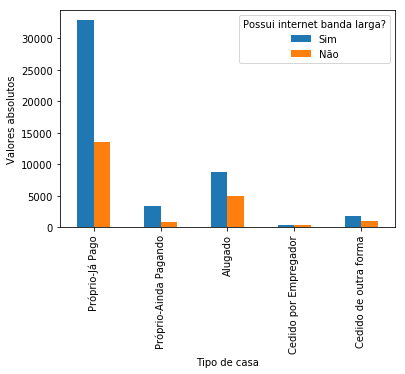

In [20]:
plot = ct1.iloc[0:5,].plot(kind='bar')
plt.ylabel('Valores absolutos')

In [10]:
def faixasph(df2):
    x=df2['V4621']
    if x<100: return 1
    elif x<200: return 2
    elif x<300: return 3
    elif x<400: return 4
    elif x<500: return 5
    elif x<600: return 6
    elif x<700: return 7
    elif x<800: return 8
    elif x<900: return 9
    elif x<1000: return 10
    return 11
faixas=df2.apply(faixasph,axis=1)
df2['faixas']=faixas
df2.faixas=df2.faixas.astype('category')
df2.faixas.cat.categories=(['100','200','300','400','500','600','700','800','900','1000','+1000'])




C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\mathe\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


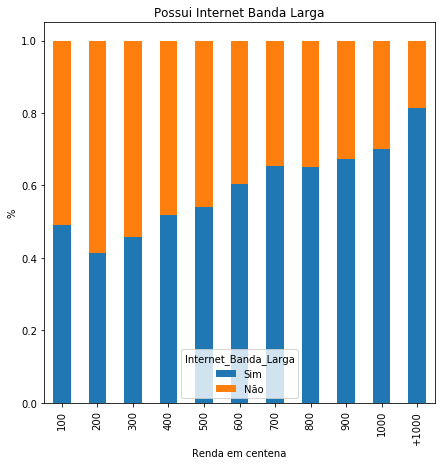

In [11]:
df2['Internet_Banda_Larga']=df2.V02426
ph=pd.crosstab(df2.faixas,df2.Internet_Banda_Larga,normalize='index')
ph.plot(kind='bar',stacked='True',legend=['Sim','Nao'],title='Possui Internet Banda Larga',figsize=(7,7))
plt.ylabel('%')
plt.xlabel('Renda em centena')

C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


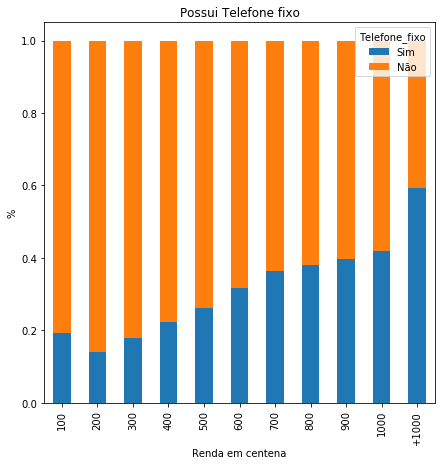

In [14]:
df2['Telefone_fixo']=df2.V2020
ph=pd.crosstab(df2.faixas,df2.Telefoneixo,normalize='index')
ph.plot(kind='bar',stacked='True',legend=['Sim','Nao'],title='Possui Telefone fixo',figsize=(7,7))
plt.ylabel('%')
plt.xlabel('Renda em centena')

In [17]:
df2.to_csv('projeto1.csv')

## Conclusão


Após gerar os gráficos foi possível observar um comportamento próximo do que era esperado, uma vez que considerando a renda e o tipo de moradia, a população que possuía acesso a internet via banda larga ainda era uma grande parcela, onde numa vista mais detalhada é possível dizer que o tipo de moradia não interfere tanto no acesso a rede, porém ja com a renda a porcentagem de pessoas com acesso diminui, mesmo ainda sendo uma grande parte. Em relação ao telefone fixo é possível observar que seu uso pode não estar sendo considerado uma prioridade, pois o gráfico das moradias demonstra que mais da metade não utiliza o telefone fixo e de acordo com a renda quanto menor ela é menor é o uso do telefone fixo.
